IS362 Week 13 Assignment

In [76]:
#loaded libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

**Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.** 

In [77]:
mushroomData = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',sep=',', header=None, usecols=[0,5,9,22], names=["Edibility","Odor","Color","Habitat"])
mushroomData            

,Edibility,Odor,Color,Habitat
0,p,p,k,u
1,e,a,k,g
2,e,l,n,m
3,p,p,n,u
4,e,n,k,g
5,e,a,n,g
6,e,a,g,m
7,e,l,n,m
8,p,p,p,g
9,e,a,g,m


**Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics. **

In [78]:
columns = [mushroomData.Edibility,mushroomData.Odor,mushroomData.Color,mushroomData.Habitat]
columnNames = ["Edibility","Odor","Color","Habitat"]
transDict = {}
counter = 0
columnCounter = 0
columnNamesCounter = 0
mushroomDataNums = pd.DataFrame()

for n in range(4):
    for odorType in columns[columnCounter]:
        if odorType not in transDict:
            transDict[odorType] = counter
            counter += 1


    oldValues = list(transDict.keys())
    newValues = list(transDict.values())
    
    mushroomDataNums[columnCounter] = mushroomData[[columnNamesCounter]].replace(oldValues,newValues)
    
    columnCounter += 1
    columnNamesCounter += 1
    counter = 0
    transDict = {}
    
mushroomDataNums.columns = columnNames
mushroomDataNums

,Edibility,Odor,Color,Habitat
0,0,0,0,0
1,1,1,0,1
2,1,2,1,2
3,0,0,1,0
4,1,3,0,1
5,1,1,1,1
6,1,1,2,2
7,1,2,1,2
8,0,0,3,1
9,1,1,2,2


**Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected. **

In [79]:
# LinearRegression will expect an array of shape (n, 1) 
# for the "Mushroomdata"
X = mushroomDataNums['Edibility'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = mushroomDataNums['Odor'].values

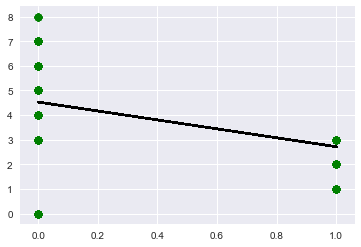

In [80]:
model2 = LinearRegression()
model2.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, model2.predict(X),color='k')

plt.show()

In [81]:
# LinearRegression will expect an array of shape (n, 1) 
# for the "Mushroomdata"
X = mushroomDataNums['Edibility'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = mushroomDataNums['Color'].values

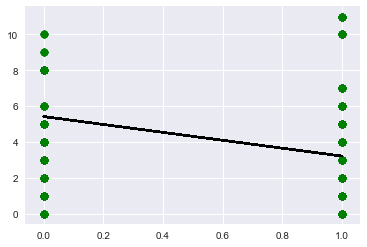

In [82]:
model2 = LinearRegression()
model2.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, model2.predict(X),color='k')

plt.show()

In [83]:
# LinearRegression will expect an array of shape (n, 1) 
# for the "Mushroomdata"
X = mushroomDataNums['Edibility'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = mushroomDataNums['Habitat'].values

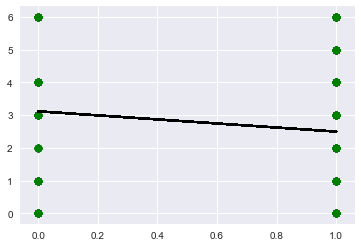

In [84]:
model2 = LinearRegression()
model2.fit(X, y)

plt.scatter(X, y,color='g')
plt.plot(X, model2.predict(X),color='k')

plt.show()

**in conclusion**

I used the sklearn.LinearRegression.fit to take takes two arguments. First the "Color", which should be a 2D array, and second the "target values". In the case considered here, we simply what to make a fit, so we do not care about the notions too much, but we need to bring the first input to that function into the desired shape. This can be easily done by creating a new axis to one of the arrays, i.e. mushroomDatanums['edibility'].values[:,np.newaxis]